<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_ex_matplotlib2_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Matplotlib **Evolução**

Aprimore aqui como empregar o modo `artist layer` e como empregar gráficos de linha para acompanhar a tendência ou evolução dos dados.




# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# **CASE: fmri**

Nos exercícios a seguir partimos da seguinte base de dados:

In [ ]:
df = sns.load_dataset('fmri')
df = df.sort_values('timepoint')
df.head()

,subject,timepoint,event,region,signal
1063,s0,0,cue,parietal,-0.006899
258,s7,0,stim,parietal,0.004081
259,s6,0,stim,parietal,-0.023319
260,s5,0,stim,parietal,-0.051228
865,s5,0,cue,frontal,-0.027033


In [ ]:
#@markdown This cell is configured to not execute. Do not change this.
%%script echo skipping
df = df.sort_values('timepoint')
df.head()

np.random.seed(1)
r = np.random.randint(0,len(df.subject.unique())+1,len(df.subject.unique()))
s = np.sort( df.subject.unique() )
r = s[r]

for i in range(len(s)):
  df.subject = df.subject.replace(r[i],'x')
  df.subject = df.subject.replace(s[i],r[i])
  df.subject = df.subject.replace('x',s[i])

df.to_csv('fmri.csv',index=None)

df = pd.read_csv('fmri.csv')
df.head()


skipping


# Pré Exercício Iterando no `ax[i,j]`

Veja aqui formas diferentes de empregar o vetor `ax`.

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

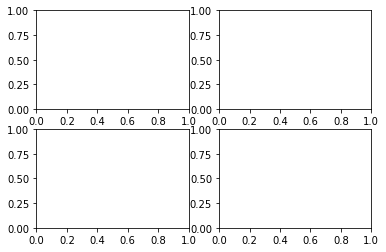

In [ ]:
fig, ax = plt.subplots(2,2)
ax

In [ ]:
ax.reshape(-1)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [ ]:
( ax1, ax2 ) = ax
ax1

array([<Axes: >, <Axes: >], dtype=object)

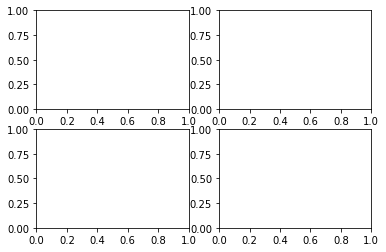

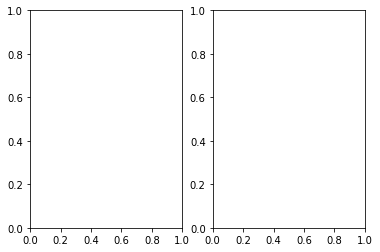

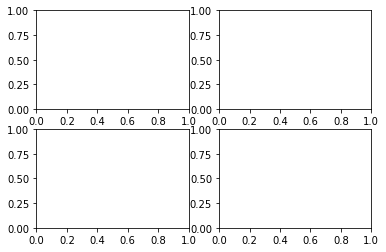

In [ ]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2)

# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Exercício 1  

Use algumas das formas acima para, partindo do último exercício da lista anterior, produzir um gráfico como abaixo para os sujeitos `s0` a `s8`, empregando o modo `artist layer` e **iterando sobre os elementos de `ax`**. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_1.png)

Q. Você pode concluir que todos os sinais, de estímulos e repouso, têm aproximadamente o mesmo comportamento para todos os sujeitos?

### Solução 1: iterando `i,j`

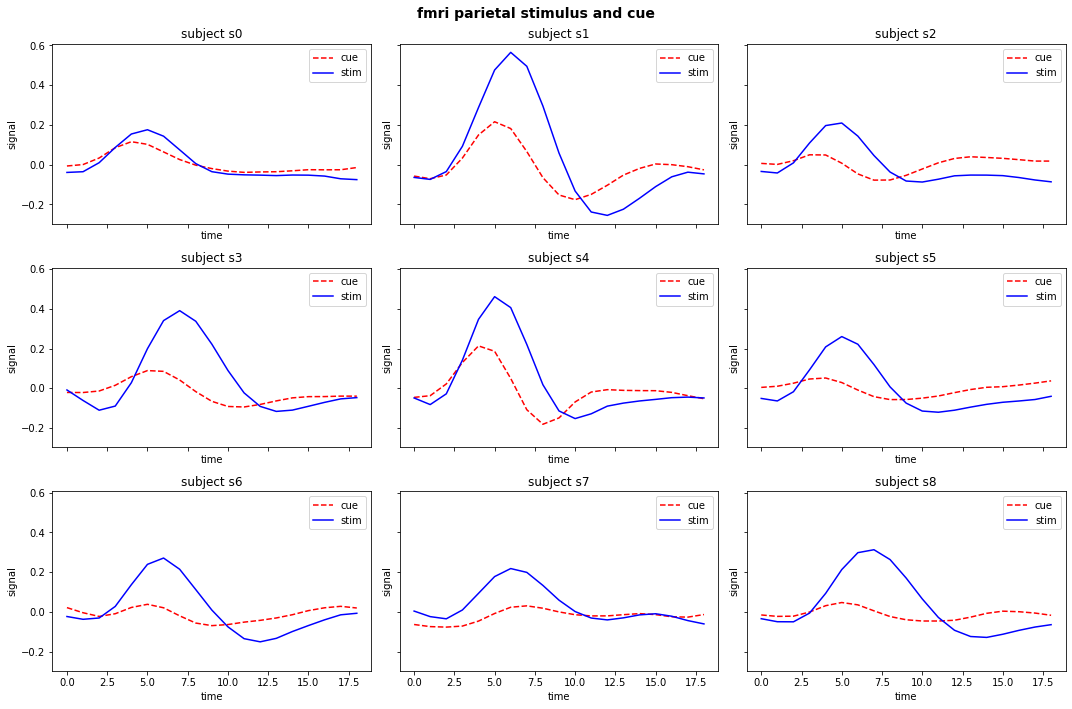

In [ ]:
fig, ax= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i_s = 0

for i in range(0,ax.shape[0]):
  for j in range(0,ax.shape[1]):

    s = 's' + str(i_s)

    for e in df.event.unique():
      mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
      ax[i,j].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

    ax[i,j].set_title('subject ' + s, fontsize=12)
    ax[i,j].set_xlabel('time')
    ax[i,j].set_ylabel('signal')
    ax[i,j].legend()

    i_s = i_s + 1

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

### Solução 2: iterando `i`

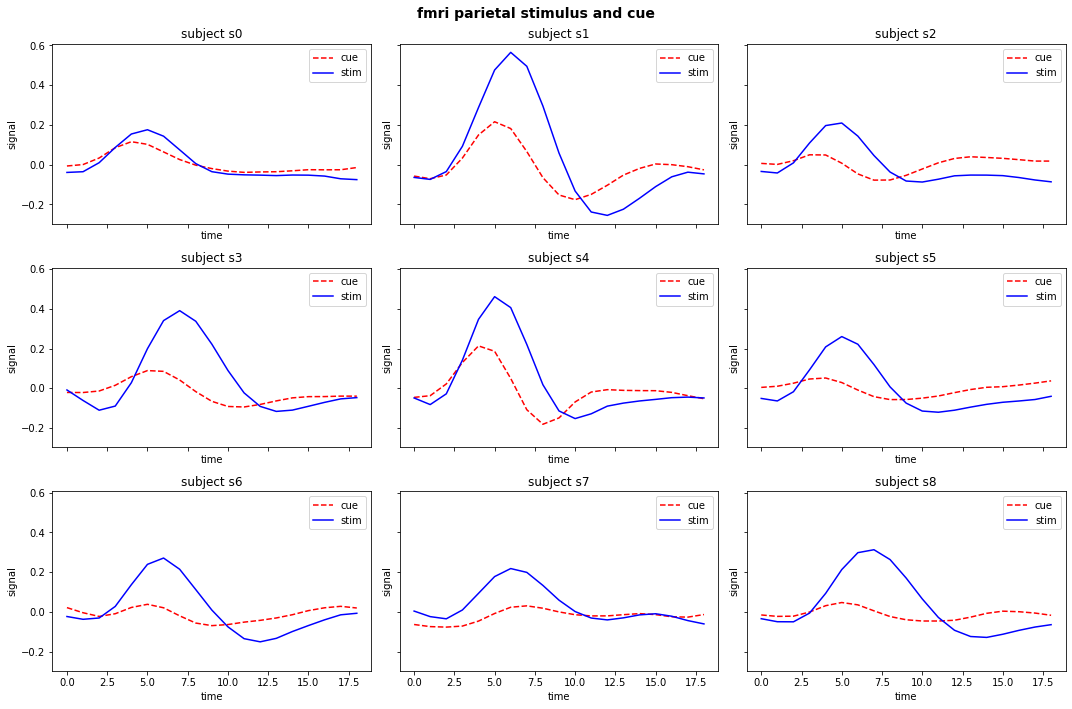

In [ ]:
fig, axis= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

ax = axis.reshape(-1)

for i in range(0,9):
  s = 's' + str(i)

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    ax[i].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[i].set_title('subject ' + s, fontsize=12)
  ax[i].set_xlabel('time')
  ax[i].set_ylabel('signal')
  ax[i].legend()

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

Experimente também o `zip` para as iterações...

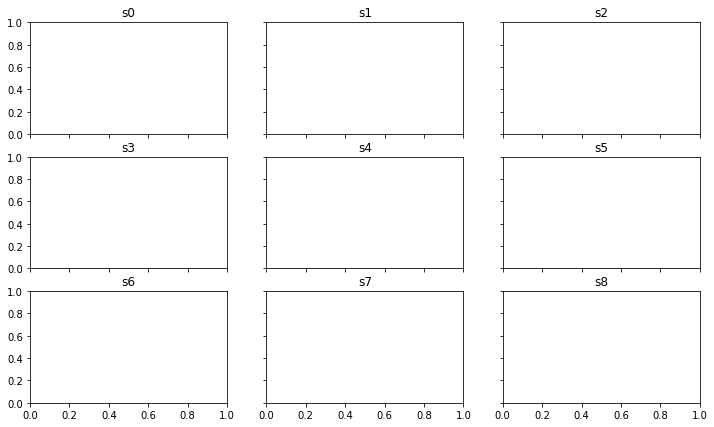

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(12,7),sharex=True,sharey=True)

for axis, s in zip(ax.reshape(-1),(['s' + str(x) for x in range(0,10)])):
  axis.set_title(s)

plt.show()


# Exercício 2

Acima você observou 9 sujeitos com o comportamento mais ou menos semelhante tanto nas situações de estímulo como repouso. Mas você pode fazer melhor e empregar toda a base para comparar os sinais com o sinal médio de todos os sujeitos. Faça isso neste exercício produzindo um gráfico como abaixo. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_2.png)

Q. Quais sujeitos mais se assemelham e quais mais se distanciam do comportamento médio?

In [ ]:
df_mean = df.groupby(['timepoint','event','region']).signal.mean().reset_index()
df_mean.head()

,timepoint,event,region,signal
0,0,cue,frontal,-0.013137
1,0,cue,parietal,-0.023166
2,0,stim,frontal,-0.005349
3,0,stim,parietal,-0.024995
4,1,cue,frontal,-0.015612


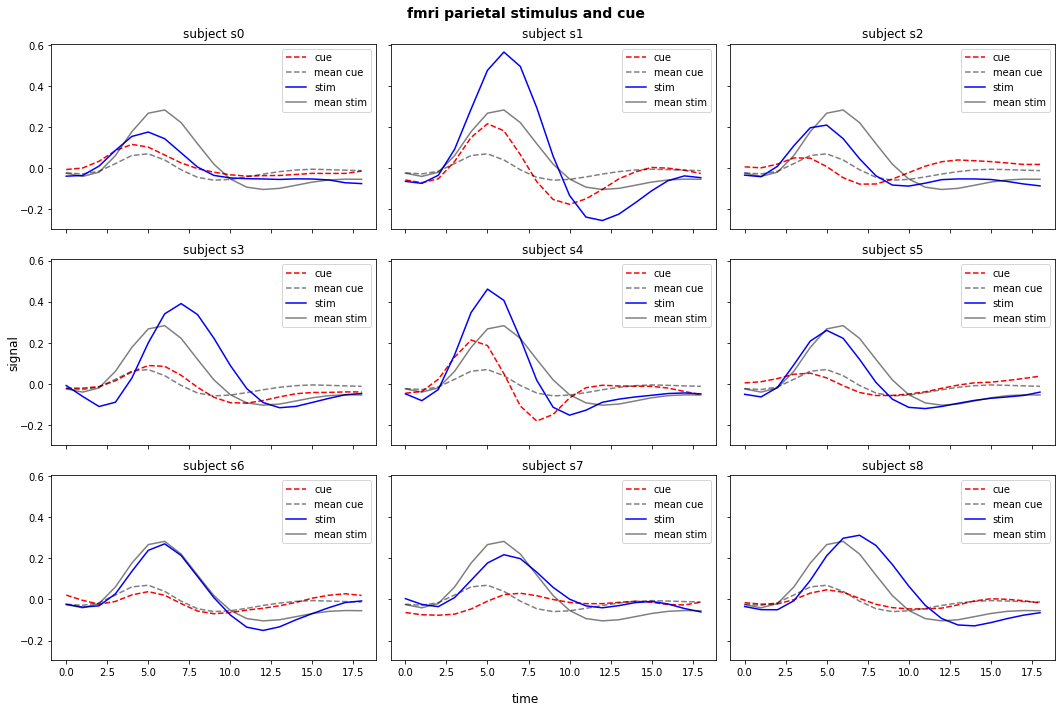

In [ ]:
fig, axis= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

for ax, s in zip(axis.reshape(-1),(['s' + str(x) for x in range(0,10)])):

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    ax.plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

    mask = (df_mean.event == e) & (df_mean.region == 'parietal')
    ax.plot(df_mean[ mask ].timepoint, df_mean[ mask ].signal, color='k', linestyle=linestyle[e], label='mean ' + e, alpha=0.5)

  ax.set_title('subject ' + s, fontsize=12)
  ax.legend()

plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')
fig.supxlabel('time')
fig.supylabel('signal')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_2.png')

# **CASE: Yahoo Finance**

Nos exercícios a seguir partimos da seguinte base de dados extraída do `yahoo finance`:

<small>
Para consulta de ativos no Yahoo Finance, pesquise em: https://ca.finance.yahoo.com/lookup

In [ ]:
%%capture
!pip install yfinance

In [ ]:
import yfinance as yf

data = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BRL=X'],'2018-10-01','2022-03-01')

df = data['Adj Close'].reset_index()
df.head()

[*********************100%***********************]  5 of 5 completed


,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
0,2018-10-01,4.0527,24.636938,9.295506,42.865036,78624.0
1,2018-10-02,4.0164,25.585817,10.101118,43.432785,81612.0
2,2018-10-03,3.9395,26.743677,10.530481,42.545677,83273.0
3,2018-10-04,3.9004,26.771910,10.632291,41.729534,82953.0
4,2018-10-05,3.8739,26.681540,10.605730,40.799854,82322.0


In [ ]:
#@markdown This cell is configured to not execute. Do not change this.
%%script echo skipping
np.random.seed(1)

data2 = yf.download(['MGLU3.SA', 'LREN3.SA', 'BRAP3.SA', 'BTC-USD'],'2018-10-01','2022-03-01')

df2 = data2['Adj Close'].reset_index()

df[['ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP']] = df2[['MGLU3.SA', 'LREN3.SA', 'BRAP3.SA', 'BTC-USD']]

# df.head()

skipping


# Pré Exercício

Os valores estão em reais. Crie para cada ticket de ação o valor em USD criando um novo atributo `<ticket>_USD`. Em seguida empregue a função `pd.to_datetime()` para converter o formato de Date.

In [ ]:
for c in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  df[c + '_USD'] = df[c] / df['BRL=X']

df.head()

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,ITUB4.SA_USD,PETR4.SA_USD,VALE3.SA_USD
0,2018-10-01,4.0527,24.636938,9.295506,42.865036,78624.0,6.079142,2.293657,10.576908
1,2018-10-02,4.0164,25.585817,10.101118,43.432785,81612.0,6.370336,2.514968,10.813860
2,2018-10-03,3.9395,26.743677,10.530481,42.545677,83273.0,6.788597,2.673050,10.799765
3,2018-10-04,3.9004,26.771910,10.632291,41.729534,82953.0,6.863888,2.725949,10.698783
4,2018-10-05,3.8739,26.681540,10.605730,40.799854,82322.0,6.887514,2.737740,10.531985


In [ ]:
df.Date = pd.to_datetime(df.Date)

In [ ]:
#@markdown Must be True
((df.shape[1] == 9) and (df.Date.dtype == '<M8[ns]'))

True

# Exercício 3

Produza um gráfico como abaixo.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_3.png)

Note que o eixo y é compartilhado. Depois de fazer uma primeira versão do seu gráfico você pode achar interessante consultar https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib para ver alternativas de como ajustar as escalas do eixo `x`.

Q. Qual ação teve maiores valores absolutos no período?

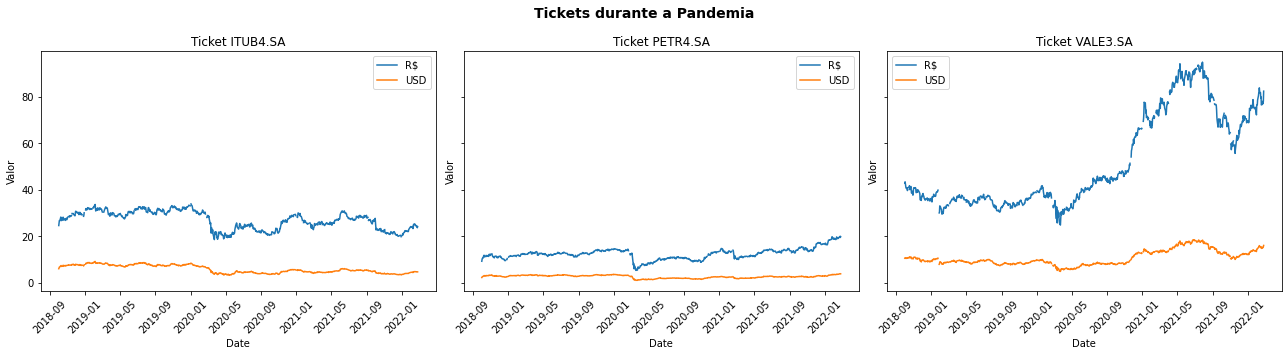

In [ ]:
fig, ax= plt.subplots(1,3,figsize=(18,5),sharey=True)

for ax, c in zip(ax,['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']):
  ax.plot(df.Date, df[c], label='R$')
  ax.plot(df.Date, df[c + '_USD'], label='USD')

  ax.set_title('Ticket ' + c, fontsize=12)
  ax.set_xlabel('Date')
  ax.set_ylabel('Valor')
  ax.legend()

  ax.tick_params(axis='x', rotation=45)

plt.suptitle('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_3.png')

# Exercício 4

Produza um gráfico como abaixo.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_4.png)

Basicamente, agora, você vai empregar duas escalas para o eixo y para representar valores em reais e em dólar.

Q. Para empregar dois eixos y compartilhados...


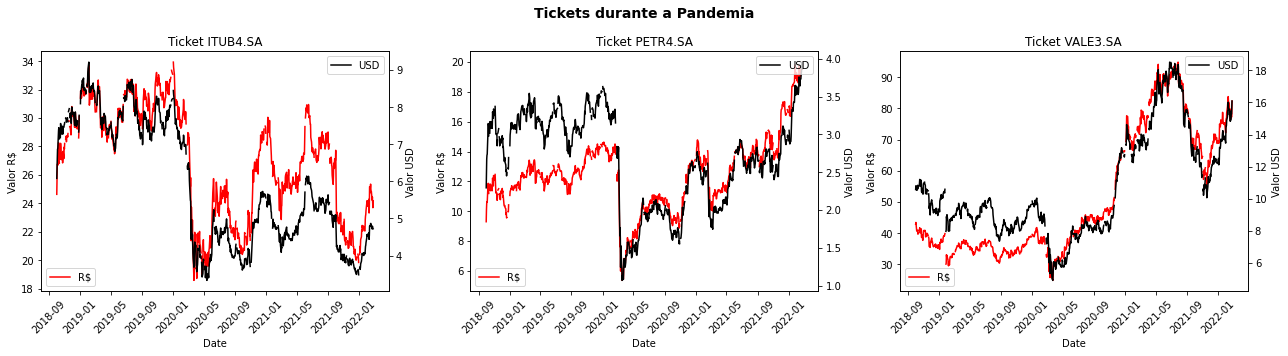

In [ ]:
fig, ax= plt.subplots(1,3,figsize=(18,5))

for ax, c in zip(ax,['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']):
  ax.plot(df.Date, df[c], color='r', label='R$')

  ax2 = ax.twinx()
  ax2.plot(df.Date, df[c + '_USD'], color='k', label='USD')

  ax.set_title('Ticket ' + c, fontsize=12)
  ax.set_xlabel('Date')
  ax.set_ylabel('Valor R$')
  ax2.set_ylabel('Valor USD')
  ax.legend(loc='lower left')
  ax2.legend(loc='upper right')

  ax.tick_params(axis='x', rotation=45)

plt.suptitle('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_4.png')


# Exercício 5

Produza um gráfico como abaixo.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_5.png)

O primeiro eixo y apresenta valores em dólar dos ativos e o segundo eixo y os pontos do ibovespa.

Dica: use `legend(loc=...)`

Q. Qual ativo teve uma recuperação mais rápida do seu valor após a maior desvalorização no período observado?


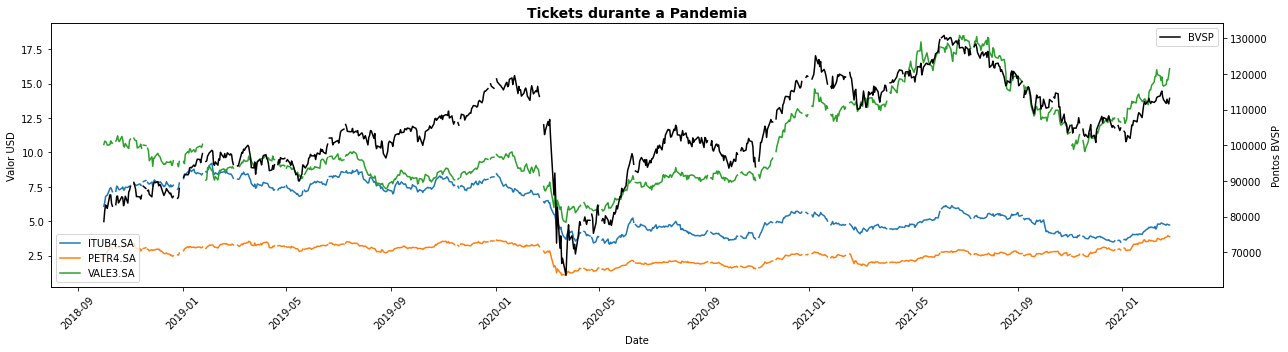

In [ ]:
fig, ax= plt.subplots(figsize=(18,5))


for c in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  ax.plot(df.Date, df[c + '_USD'], label=c)

ax2 = ax.twinx()
ax2.plot(df.Date, df['^BVSP'], color='k', label='BVSP')

ax.set_xlabel('Date')
ax.set_ylabel('Valor USD')
ax2.set_ylabel('Pontos BVSP')
ax.legend(loc='lower left')
ax2.legend(loc='upper right')

ax.tick_params(axis='x', rotation=45)

plt.title('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_5.png')


# Exercício 6

Produza um gráfico como abaixo buscando uma função do `Pandas` para substituir os valores ausentes por valores médios entre os pontos.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_6.png)

Adicione ainda uma linha vertical e um rótulo (texto) no ponto que o valor das ações indica o impacto da primeira onda de Covid no mercado brasileiro.

Dica: use `legend(loc=...)`

Q. Qual é a função do `Pandas` que substitui os valores ausentes por valores médios entre os pontos e qual ativo teve o maior ponto de desvalorização no gráfico anterior mais *suavizado*?

In [ ]:
df_interpolate = df.drop(columns='Date').interpolate()
df = pd.concat([ df.Date, df_interpolate ], axis=1)
df.head()

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,ITUB4.SA_USD,PETR4.SA_USD,VALE3.SA_USD
0,2018-10-01,4.0527,24.636938,9.295506,42.865036,78624.0,6.079142,2.293657,10.576908
1,2018-10-02,4.0164,25.585817,10.101118,43.432785,81612.0,6.370336,2.514968,10.813860
2,2018-10-03,3.9395,26.743677,10.530481,42.545677,83273.0,6.788597,2.673050,10.799765
3,2018-10-04,3.9004,26.771910,10.632291,41.729534,82953.0,6.863888,2.725949,10.698783
4,2018-10-05,3.8739,26.681540,10.605730,40.799854,82322.0,6.887514,2.737740,10.531985


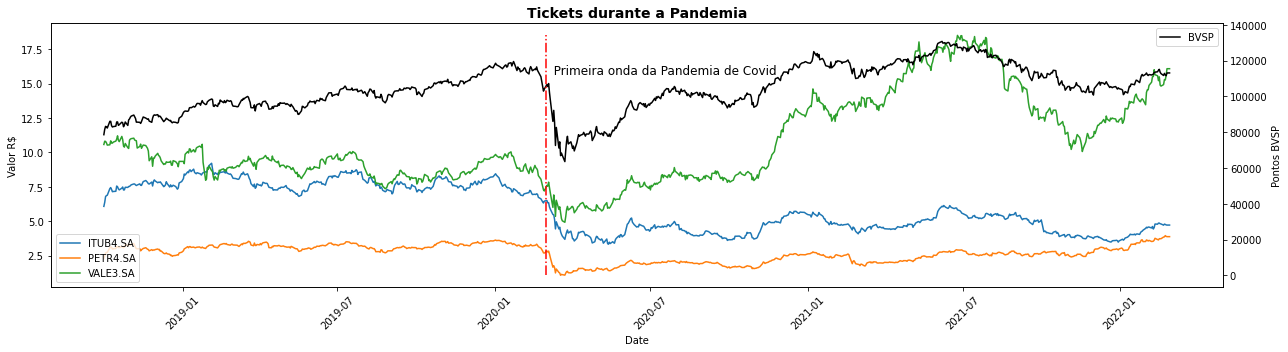

In [ ]:
fig, ax= plt.subplots(figsize=(18,5))

for c in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  ax.plot(df.Date, df[c + '_USD'], label=c)

ax2 = ax.twinx()
ax2.plot(df.Date, df['^BVSP'], color='k', label='BVSP')

ax.set_xlabel('Date')
ax.set_ylabel('Valor R$')
ax2.set_ylabel('Pontos BVSP')
ax.legend(loc='lower left')
ax2.legend(loc='upper right')

ax.tick_params(axis='x', rotation=45)

plt.title('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.vlines( pd.to_datetime('2020-03-01') , 0, ax2.get_ylim()[1], color='r', linestyle='-.' )
plt.text( pd.to_datetime('2020-03-01') , 4* ax2.get_ylim()[1] / 5, '  Primeira onda da Pandemia de Covid', fontsize=12 )

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_6.png')